<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201%20Pandas/uwu/AirlineDelay2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Delay 2017 <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nur Izzah Mardhiah binti Rashidi A20EC0116
2. Radin Dafina binti Radin Zulkar Nain A20EC0135

Lecturer: Prof. Madya. Ts. Dr. Mohd Shahizan Bin Othman

# **Downloading the Dataset**

1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur).

2. Unzip the file. The folder contains an Excel file, where the dataset is.

3. Upload the Excel file into Google Drive. 


To use the dataset, we mount the Google Drive to Google Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To read the dataset, we assign a variable named 'dataset' to the path of the file in Google Drive. 

In [2]:
dataset_2017 = '/content/drive/MyDrive/Colab Notebooks/Assignment 2/2017.csv'

# **Sampling**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, warnings, scipy 
import random

In [4]:
n = sum(1 for line in open(dataset_2017))
print("Before Sampling:", n, "rows")
df = pd.read_csv(dataset_2017)
print(df.info(verbose=False, memory_usage='deep'))

Before Sampling: 5674622 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674621 entries, 0 to 5674620
Columns: 28 entries, FL_DATE to Unnamed: 27
dtypes: float64(20), int64(3), object(5)
memory usage: 2.4 GB
None


In [5]:
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(dataset_2017, skiprows=skip)

In [6]:
print("After 10% Sampling:", s, "rows")
print(df.info(verbose=False, memory_usage='deep'))

After 10% Sampling: 567462 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567462 entries, 0 to 567461
Columns: 28 entries, FL_DATE to Unnamed: 27
dtypes: float64(20), int64(3), object(5)
memory usage: 250.2 MB
None


# **Chunking**

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
result = None
for chunk in pd.read_csv(dataset_2017, chunksize=1000):
    c = chunk['OP_CARRIER']
    chunk_result = c.value_counts()
    if result is None:
        result = chunk_result
    else:
        result = result.add(chunk_result, fill_value=0)

result.sort_values(ascending=False, inplace=True)
print(result)

WN    1329444.0
DL     923560.0
AA     896348.0
OO     706527.0
UA     584481.0
EV     339541.0
B6     298654.0
AS     185068.0
NK     156818.0
F9     103027.0
HA      80172.0
VX      70981.0
Name: OP_CARRIER, dtype: float64


# **Data Preparation and Cleaning**


In [9]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,22,LAX,JFK,1340,1346.0,6.0,14.0,1400.0,...,328.0,317.0,289.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,AA,43,DTW,DFW,1529,1523.0,-6.0,11.0,1534.0,...,186.0,179.0,156.0,986.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,AA,60,DFW,MIA,1730,1733.0,3.0,10.0,1743.0,...,163.0,149.0,135.0,1121.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,AA,72,LAX,LAS,813,810.0,-3.0,15.0,825.0,...,80.0,67.0,46.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,AA,84,JFK,SEA,2050,2048.0,-2.0,24.0,2112.0,...,393.0,392.0,341.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567457,2017-12-31,UA,2391,SLC,EWR,1315,1310.0,-5.0,11.0,1321.0,...,253.0,238.0,217.0,1969.0,NaN,NaN,NaN,NaN,NaN,NaN
567458,2017-12-31,UA,2395,EWR,IAD,1020,1020.0,0.0,14.0,1034.0,...,90.0,70.0,52.0,212.0,NaN,NaN,NaN,NaN,NaN,NaN
567459,2017-12-31,UA,2409,IAH,JAC,940,932.0,-8.0,12.0,944.0,...,218.0,209.0,189.0,1265.0,NaN,NaN,NaN,NaN,NaN,NaN
567460,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info

<bound method DataFrame.info of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                 22    LAX  JFK          1340   
1       2017-01-01         AA                 43    DTW  DFW          1529   
2       2017-01-01         AA                 60    DFW  MIA          1730   
3       2017-01-01         AA                 72    LAX  LAS           813   
4       2017-01-01         AA                 84    JFK  SEA          2050   
...            ...        ...                ...    ...  ...           ...   
567457  2017-12-31         UA               2391    SLC  EWR          1315   
567458  2017-12-31         UA               2395    EWR  IAD          1020   
567459  2017-12-31         UA               2409    IAH  JAC           940   
567460  2017-12-31         UA               2425    RSW  ORD          1611   
567461  2017-12-31         UA               2429    EWR  DEN          1510   

        DEP_TIME  DEP_DELAY  TA

Remove the column that contribute many null values

In [11]:
df.drop(['Unnamed: 27', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WHEELS_ON', 'TAXI_IN'], axis=1, inplace=True)

In [12]:
df.isnull().any(axis=1).sum()

9521

## **Remove rows with null value**



In [13]:
df.dropna(inplace=True)

In [14]:
df.info

<bound method DataFrame.info of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                 22    LAX  JFK          1340   
1       2017-01-01         AA                 43    DTW  DFW          1529   
2       2017-01-01         AA                 60    DFW  MIA          1730   
3       2017-01-01         AA                 72    LAX  LAS           813   
4       2017-01-01         AA                 84    JFK  SEA          2050   
...            ...        ...                ...    ...  ...           ...   
567457  2017-12-31         UA               2391    SLC  EWR          1315   
567458  2017-12-31         UA               2395    EWR  IAD          1020   
567459  2017-12-31         UA               2409    IAH  JAC           940   
567460  2017-12-31         UA               2425    RSW  ORD          1611   
567461  2017-12-31         UA               2429    EWR  DEN          1510   

        DEP_TIME  DEP_DELAY  TA

## **Change Data Type**

In [15]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
dtype: object

Convert string to DateTime

In [16]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [17]:
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month

**Filter non-delayed flights (negative)**

In [18]:
df = df[(df['ARR_DELAY'] > 0)] 
df = df[(df['DEP_DELAY'] > 0)] 

## **Others**

**Change minutes to hours**

In [19]:
df['ARR_DELAY'] = df['ARR_DELAY'] / 60
df['DEP_DELAY'] = df['DEP_DELAY'] / 60

**Rename airlines name**

In [20]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

# **Exploratory Analysis and Visualization**



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DATE_month
count,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000,140090.0,140090.0,140090.000000,140090.000000,140090.000000,140090.000000,140090.000000
mean,2160.360069,1472.808980,1515.713606,0.812472,18.682982,1535.555557,1616.673867,1574.126504,0.789414,0.0,0.0,146.494054,145.110593,118.747691,859.547862,6.330102
std,1760.768027,449.403875,481.091532,1.255533,11.901891,488.949975,511.448723,597.678244,1.254819,0.0,0.0,77.337110,78.391270,75.135715,623.188655,3.295356
min,1.000000,1.000000,1.000000,0.016667,1.000000,1.000000,1.000000,1.000000,0.016667,0.0,0.0,18.000000,16.000000,8.000000,31.000000,1.000000
25%,717.000000,1127.000000,1154.000000,0.200000,11.000000,1208.000000,1307.000000,1247.000000,0.166667,0.0,0.0,88.000000,86.000000,62.000000,390.000000,4.000000
50%,1674.000000,1520.000000,1550.000000,0.433333,15.000000,1605.000000,1710.000000,1711.000000,0.400000,0.0,0.0,128.000000,126.000000,100.000000,689.000000,6.000000
75%,3190.000000,1830.000000,1912.000000,0.966667,22.000000,1927.000000,2024.000000,2033.000000,0.933333,0.0,0.0,179.000000,179.000000,150.000000,1099.000000,9.000000
max,7439.000000,2359.000000,2400.000000,26.950000,172.000000,2400.000000,2359.000000,2400.000000,27.033333,0.0,0.0,712.000000,717.000000,668.000000,4983.000000,12.000000


### **Bar Chart: Mean and Median Departure Delayed per Month**

Calculate the average and median for Departure Delay.

In [23]:
dep_average = df.groupby('FL_DATE_month').DEP_DELAY.mean()
dep_median = df.groupby('FL_DATE_month').DEP_DELAY.median()

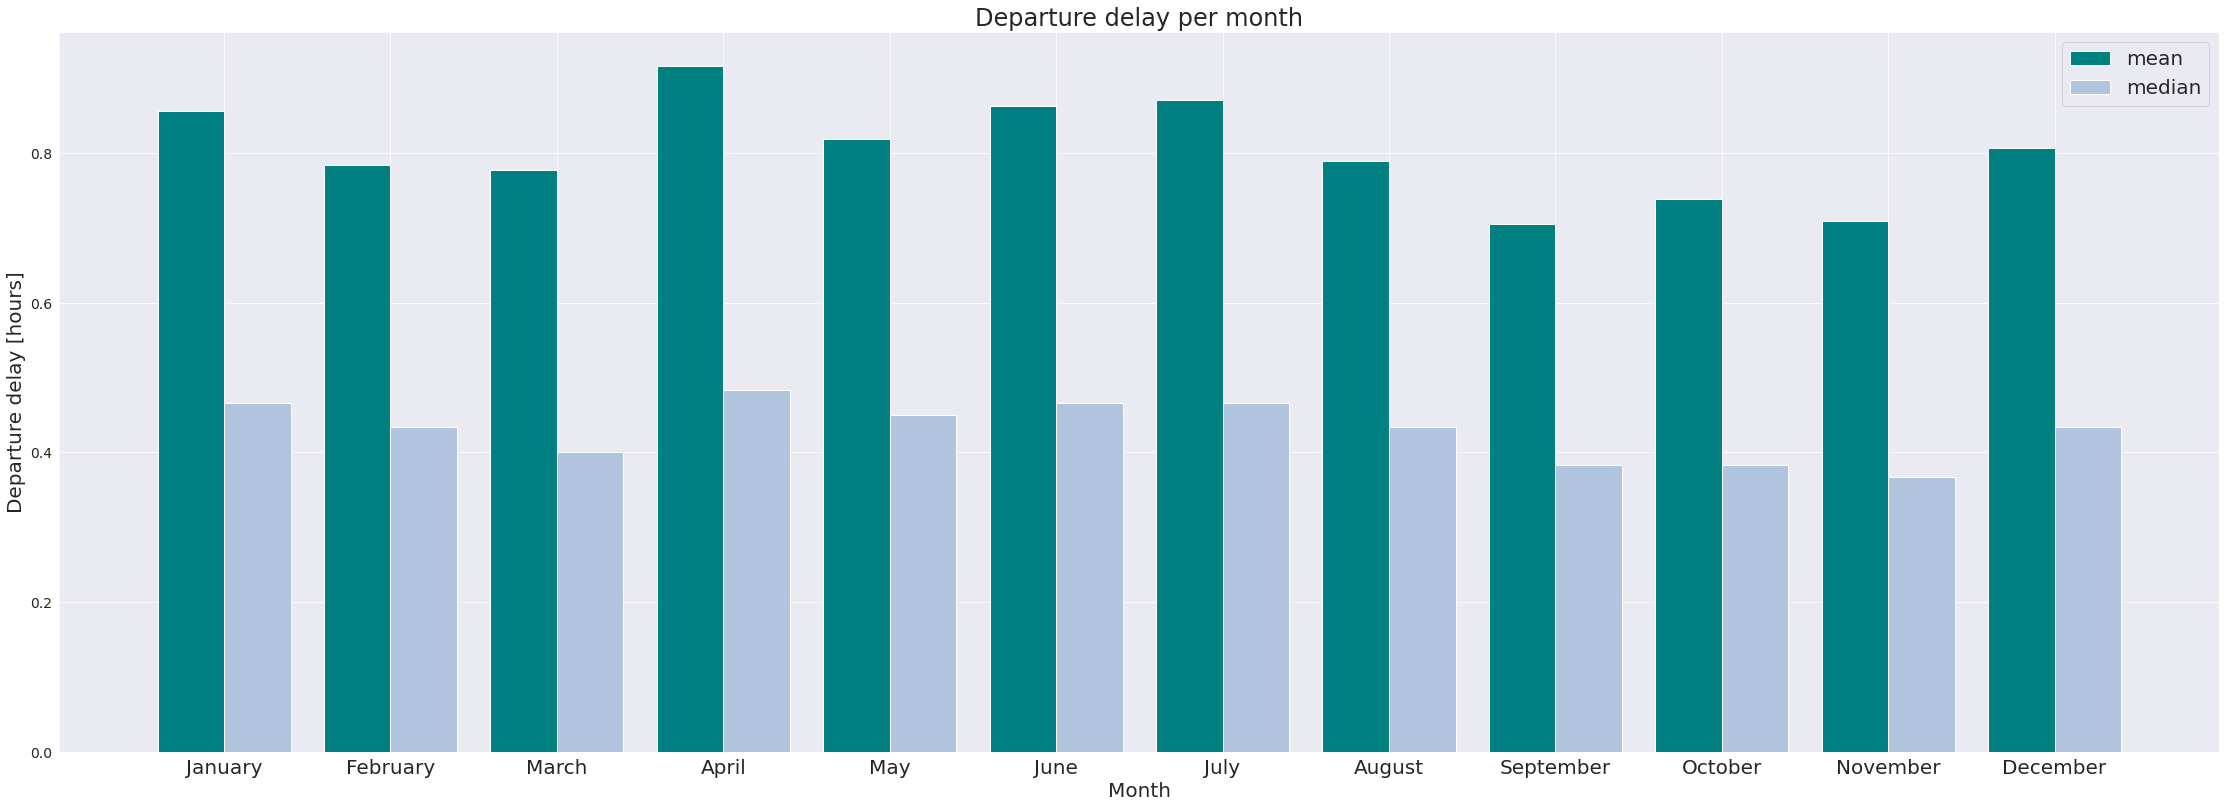

In [24]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
X = np.arange(1,13)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_axes([0,0,1,1])

p1 = ax.bar(X - 0.20, dep_average, color = 'teal', width = 0.40)
p2 = ax.bar(X + 0.20, dep_median, color = 'lightsteelblue', width = 0.40)
plt.xticks(X, month, fontsize = 20)

ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('Departure delay [hours]', fontsize = 20)
ax.set_title('Departure delay per month', fontsize = 24)
ax.legend(labels=['mean', 'median'], fontsize = 20)

As we can see in this bar graph, the highest number of departure delay by hours was in April followed by July and June.

### **Scatter Plot**

Firstly, we need to group our dataset by airline name and month. Then, we calculate the total of departure delay (hours) for each month using .sum() function. 

In [25]:
total_hours = df.groupby(['OP_CARRIER', 'FL_DATE_month'],as_index=False)['DEP_DELAY'].sum()
month = total_hours.FL_DATE_month

In [26]:
total_hours

,OP_CARRIER,FL_DATE_month,DEP_DELAY
0,Alaska Airlines,1,251.000000
1,Alaska Airlines,2,198.700000
2,Alaska Airlines,3,206.883333
3,Alaska Airlines,4,189.883333
4,Alaska Airlines,5,225.266667
...,...,...,...
139,Virgin America,8,188.700000
140,Virgin America,9,91.433333
141,Virgin America,10,143.200000
142,Virgin America,11,96.750000


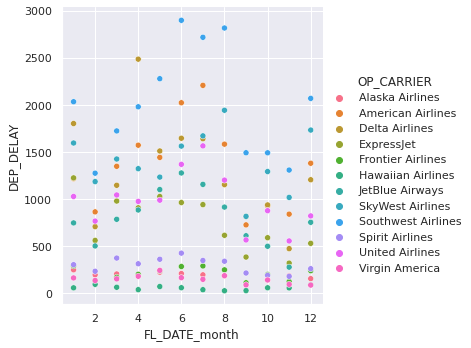

In [27]:
sns.set(rc={'figure.figsize':(50,40)})
s = sns.relplot(x=total_hours['FL_DATE_month'], 
            y=total_hours['DEP_DELAY'],
            data=total_hours, 
            hue = "OP_CARRIER", 
            kind='scatter')

Based on the scatter plot above, on January until November 2017, Frontier Airlines is the best airline of the year since it has the least delay (hours).

###  **Pie Chart: Top 10 Origin and Destination Airports** 

Sort top 10 airport with most flights

In [28]:
#Airports with most flights
F_origin = df.ORIGIN.value_counts().sort_values(ascending=False)[:10]
F_dest = df.DEST.value_counts().sort_values(ascending=False)[:10]

Top 10 Busiest Origin Airports

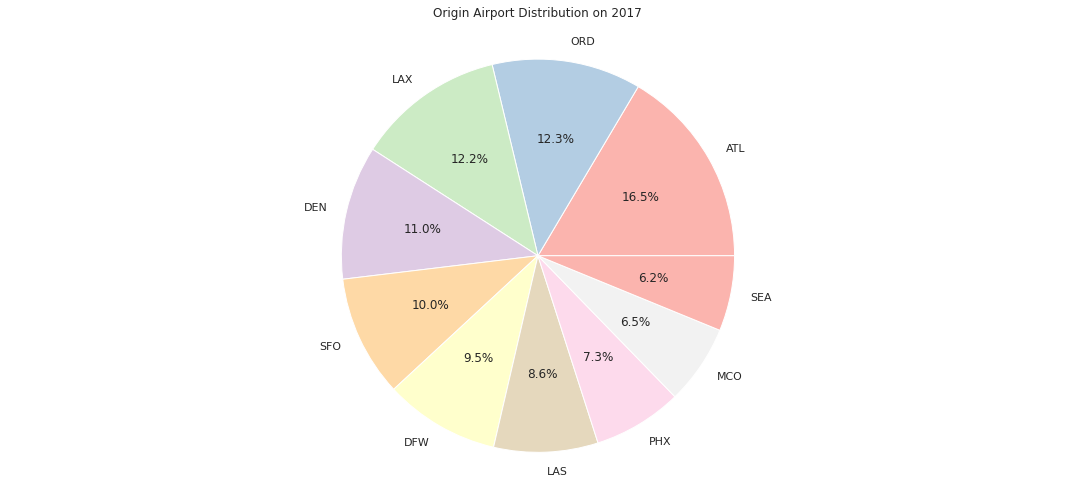

In [29]:
colors = sns.color_palette('Pastel1')
fig, ax = plt.subplots(figsize=(19, 8))
ax.pie(F_origin, labels=F_origin.index,colors = colors, autopct="%1.1f%%")
ax.axis('equal')  
plt.title("Origin Airport Distribution on 2017\n")
plt.show()

Top 10 Busiest Destination Airports

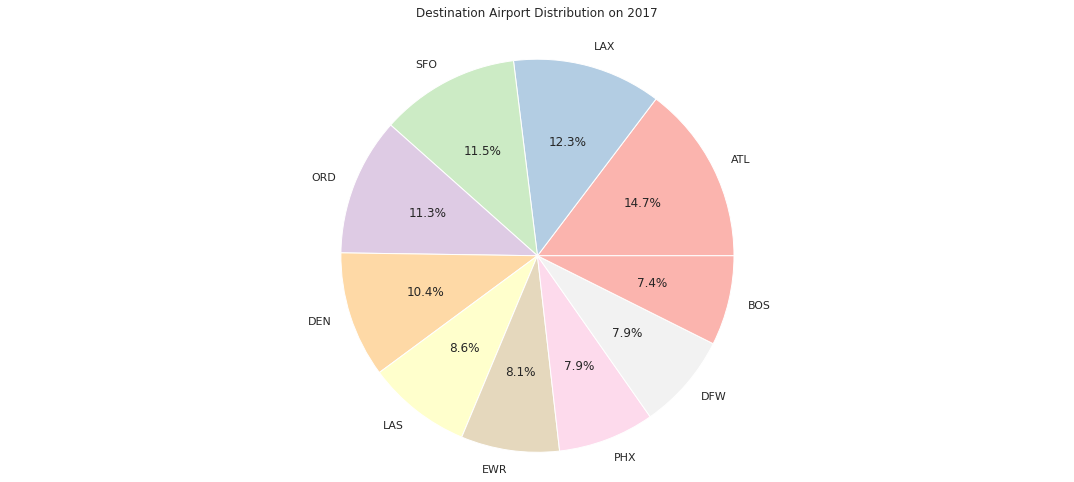

In [30]:
colors = sns.color_palette('Pastel1')
fig, ax = plt.subplots(figsize=(19, 8))
ax.pie(F_dest, labels=F_dest.index,colors = colors, autopct="%1.1f%%")
ax.axis('equal')  
plt.title("Destination Airport Distribution on 2017\n")
plt.show()

Based on these two pie charts, most of the airport that is categorized as the busiest of origin airport are also found in the busiest of destination airport (LAX, DFW, SFO, EWR, LAS, PHX, ORD, ATL and DEN)

### **Line Graph: Departure Delay for Popular Airlines** 

Identify the top five popular airlines in United States 

In [31]:
most_delayed = df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=False).head(5)
most_delayed

OP_CARRIER
Southwest Airlines    24078.950000
SkyWest Airlines      16804.900000
American Airlines     16137.516667
Delta Airlines        15533.383333
United Airlines       11768.500000
Name: DEP_DELAY, dtype: float64

In [32]:
busiest_airlines = df.groupby("OP_CARRIER").size().sort_values(ascending=False)[:5]
busiest_airlines

OP_CARRIER
Southwest Airlines    43169
American Airlines     20681
Delta Airlines        17341
SkyWest Airlines      15221
United Airlines       12496
dtype: int64

In [33]:
top5_airlines = [{'airline':'Southwest Airlines', 'color':'#233d4d'},
                 {'airline':'American Airlines', 'color':'#fe7f2d'},
                 {'airline':'Delta Airlines', 'color':'#fcca46'},
                 {'airline':'SkyWest Airlines', 'color':'#a1c181'},
                 {'airline':'United Airlines', 'color':'#619b8a'}]

Create function that calculate the mean of departure delay by month

In [34]:
def plot_delay(p):
    means = df[df['OP_CARRIER'] == p['airline']].groupby(['FL_DATE_month']).mean().reset_index() 
    line, = plt.plot(means['FL_DATE_month'], means['DEP_DELAY'], linestyle='solid', color=p['color'])
    return line              

Plot airline flights by month using given airline name and color.

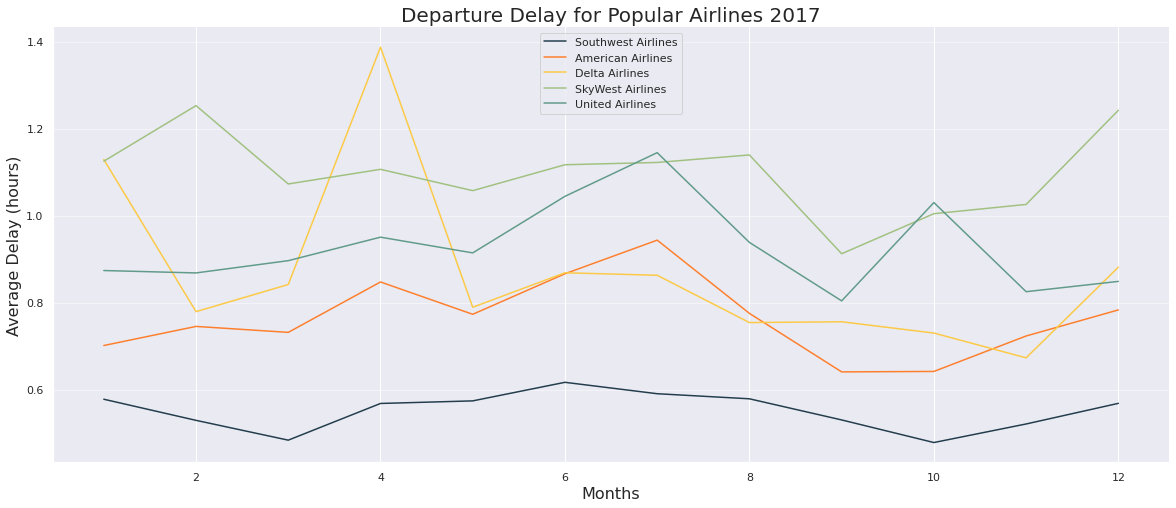

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))

delay_handles = list(map(plot_delay, top5_airlines))
delay_labels = ['Southwest Airlines','American Airlines','Delta Airlines', 'SkyWest Airlines', 'United Airlines',]

plt.legend(delay_handles, delay_labels)
plt.grid(axis='y', linewidth = 0.5)
sns.despine(top=True)
ax.set_ylabel('Average Delay (hours)', fontsize=16)
ax.set_xlabel('Months', fontsize=16)
ax.set_title("Departure Delay for Popular Airlines 2017" , fontsize=20);

Based on the line graph, we can see that over the year of 2017, Skywest Airlines has the highest average of delay (per hours). There is also an interesting spike of average delay for Delta Airlines in April. Lastly, towards the end of the year, these top five airlines slowly increasing their departure delay, probably because there was new system implemented and data became more accurate.

### **Heat Map: Air Traffic by City** 

Create new column 'FL_DATE_day' and 'FL_DATE_week'

In [36]:
df['FL_DATE_day'] = pd.to_datetime(df['FL_DATE']).dt.day_name()
df['FL_DATE_week'] = pd.to_datetime(df['FL_DATE']).dt.dayofweek

In [37]:
df['FL_DATE_day']

5         Sunday
6         Sunday
7         Sunday
8         Sunday
12        Sunday
           ...  
567438    Sunday
567446    Sunday
567448    Sunday
567454    Sunday
567461    Sunday
Name: FL_DATE_day, Length: 140090, dtype: object

Count number of flights per week per airlines.

In [38]:
flight_pivot=df.pivot_table(index='ORIGIN',columns='FL_DATE_week', values='FL_DATE_day', aggfunc=lambda x:x.count())
flight_sort = flight_pivot.sort_values(by=1,ascending=False)[:10]
print(flight_sort)

FL_DATE_week       0       1       2       3       4      5       6
ORIGIN                                                             
ATL           1458.0  1167.0  1048.0  1419.0  1451.0  993.0  1234.0
ORD           1037.0   813.0   906.0  1039.0  1143.0  655.0   936.0
DEN            958.0   812.0   828.0   921.0   953.0  692.0   696.0
LAX            993.0   810.0   870.0  1102.0  1070.0  621.0  1001.0
SFO            856.0   607.0   747.0   907.0   889.0  492.0   814.0
LAS            678.0   579.0   599.0   738.0   806.0  492.0   668.0
DFW            780.0   576.0   659.0   787.0   827.0  661.0   757.0
MCO            535.0   490.0   471.0   514.0   521.0  505.0   444.0
PHX            576.0   472.0   535.0   629.0   668.0  458.0   562.0
EWR            445.0   451.0   500.0   520.0   569.0  319.0   440.0


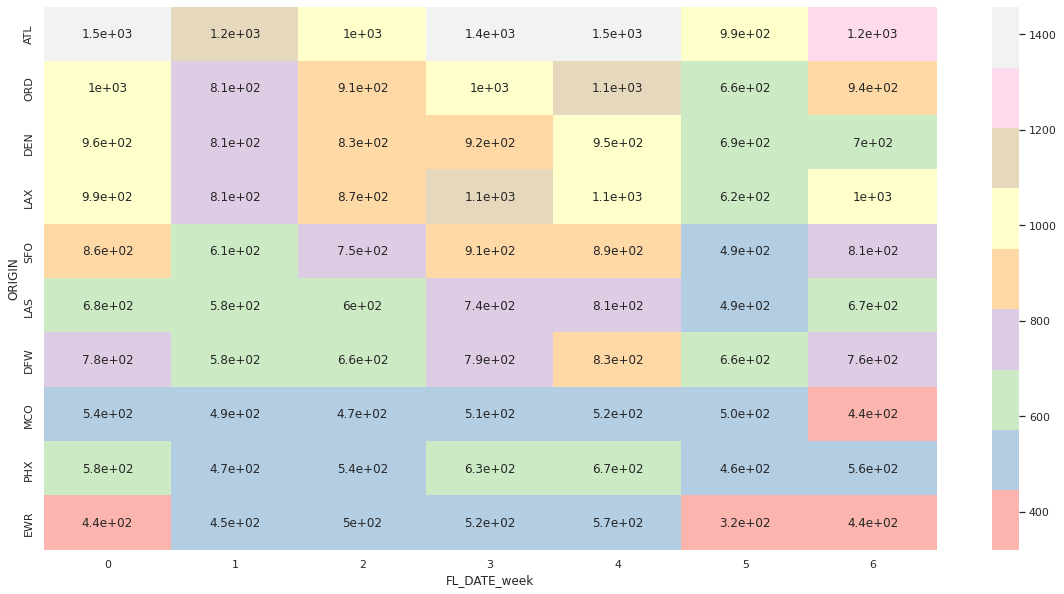

In [39]:
flight_sort = flight_sort.iloc[:10]

plt.figure(figsize=(20,10))
sns.heatmap(flight_sort, annot=True, cmap="Pastel1")
plt.show()

Looking at the diagram above, most of the origin airport have high number of air traffic on weeekdays, with ATL having the highest air traffic on Monday.


# **Asking and Answering Questions**



#### Q1: Which airlines has the least departure delays on 2017?

In [40]:
least_delays = df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=True).head(1)
least_delays

OP_CARRIER
Hawaiian Airlines    711.5
Name: DEP_DELAY, dtype: float64

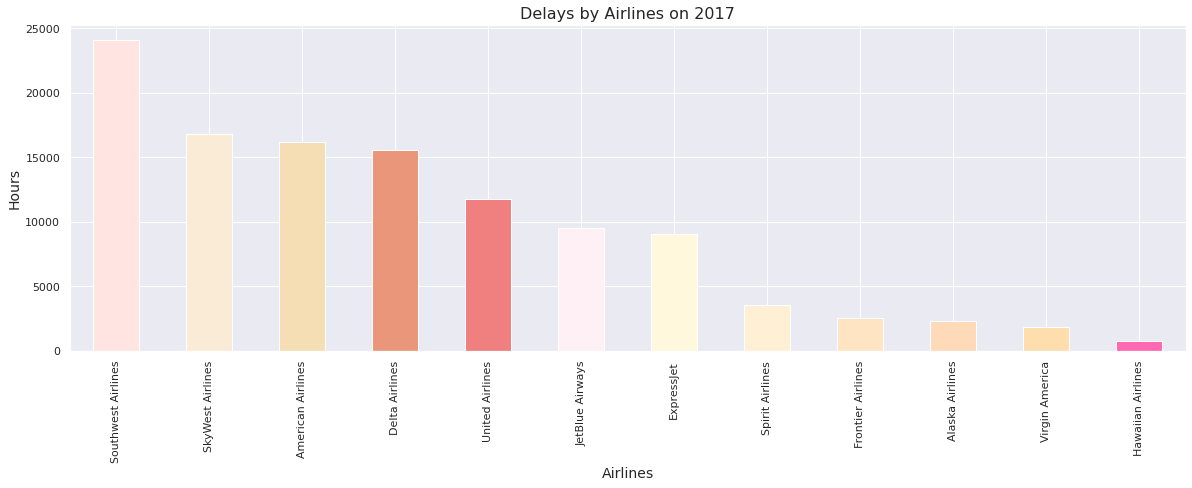

In [41]:
plt.figure(figsize=(20, 6))
c = ['mistyrose', 'antiquewhite', 'wheat', 'darksalmon', 'lightcoral', 'lavenderblush', 'cornsilk', 
          'papayawhip','bisque','peachpuff','navajowhite','hotpink']
df.groupby('OP_CARRIER').DEP_DELAY.sum().sort_values(ascending=False).plot.bar(color = c)
plt.title('Delays by Airlines on 2017', fontsize=16)
plt.xlabel('Airlines', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

*Hawaiian Airlines has the least delays with total of 588.08 hours on 2017*

#### Q2: Amirah is from MIA, she is planning to travel to anywhere at any time of the year. What is the least problematic flight that she could take?

In [42]:
least_problematic = df[df['ORIGIN'] == 'MIA']

In [43]:
least_problematic.sort_values(by=['DEP_DELAY'], ascending=True).head(1)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DATE_month,FL_DATE_day,FL_DATE_week
207342,2017-05-17,American Airlines,1907,MIA,PHL,1430,1431.0,0.016667,17.0,1448.0,...,0.183333,0.0,0.0,166.0,176.0,149.0,1013.0,5,Wednesday,2


*Amirah can take American Airlines from her origin MIA to destination MCO on 23 March 2017.*

#### Q3: How many airlines offers flight from DFW to OGG on 2017-01-03?

In [44]:
offered_flights = display(df[(df['ORIGIN']=='LAX') & (df['DEST'] == 'JFK') & (df['FL_DATE'] == '2017-01-03')])

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DATE_month,FL_DATE_day,FL_DATE_week
3063,2017-01-03,Delta Airlines,44,LAX,JFK,1135,1200.0,0.416667,29.0,1229.0,...,0.116667,0.0,0.0,330.0,312.0,265.0,2475.0,1,Tuesday,1
3959,2017-01-03,Virgin America,412,LAX,JFK,1345,1509.0,1.400000,8.0,1517.0,...,0.866667,0.0,0.0,315.0,283.0,266.0,2475.0,1,Tuesday,1


*There are three airlines that offer flight from DFW to OGG on 3rd January 2017.*

#### Q4: Which flight travels the longest distance? What is the Origin and the Destination of the flight?

In [45]:
longest_distance = df.sort_values(by=['DISTANCE'], ascending=False).head(1)

In [46]:
print(longest_distance[['OP_CARRIER','ORIGIN','DEST','DISTANCE']])

               OP_CARRIER ORIGIN DEST  DISTANCE
275252  Hawaiian Airlines    HNL  JFK    4983.0


*Hawaiian Airlines travels the longest distance on 2017, from JFK to HNL with a distance of 4983.0*

#### Q5: For each Origin, find the number of flights for three consecutive days. Use aggregation.

In [47]:
group_origin_days = df.reset_index().groupby(['FL_DATE', 'ORIGIN']).size().reset_index(name='Count').set_index('FL_DATE')

In [48]:
group_origin_days.groupby('ORIGIN')['Count'].rolling(window=3).sum().reset_index()

,ORIGIN,FL_DATE,Count
0,ABE,2017-01-01,NaN
1,ABE,2017-01-02,NaN
2,ABE,2017-01-12,3.0
3,ABE,2017-01-22,3.0
4,ABE,2017-02-14,3.0
...,...,...,...
32038,YUM,2017-07-30,3.0
32039,YUM,2017-07-31,3.0
32040,YUM,2017-09-06,3.0
32041,YUM,2017-09-07,3.0


#**Inferences and Conclusion**



1.   All of the [top 5 most delayed airlines](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=AcK5Tziq0Ojj&line=1&uniqifier=1) (Southwest Airlines, SkyWest Airlines, Delta Airlines, American Airlines, United Airlines) are all listed in the [top 5 busiest airports](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=w9M8c6EMvI--&line=2&uniqifier=1) in the United States in 2017. There could be a line of aeroplanes waiting to take off on the runway in a congested or unusually busy airport. Thus, it is expected that they have higher number of delays compared to other airlines.

2.   On the other hand, the possible factor that contributes to the delay of these airlines on the beginning and end of the year is due to annual holidays. However, the highest average delay of all airlines is between April to July due to factors that we cannot predict and need more resources and informations about the dataset.  

> Thus, we can conclude that the delay of airlines is highly affected by the number of airlines being in one airport at the same time. 
--- 

1.   Every airline have different rate of efficiency of their operations and management systems which contribute to the different hours of delay.

2.   As we can see in [Line graph](https://colab.research.google.com/drive/1uLyJxJZWB1LF4rx7nVNvPJnAFVEKfCZA?authuser=2#scrollTo=N5ClMVUvlhu2&line=5&uniqifier=1), Southwest Airlines maintained to be the least delayed airlines compared to the other four popular airlines in 2017. Southwest Airlines may have a better management and operation systems thus contribute less to the average hours of delay over the year.

> Therefore, the average hours of delay over the year is highly affected by the performance of their operations system that controls the carrier delay, aircraft delay and security delay. 

---

> In conclusion, this dataset is insufficient if we want to determine the precise reason for the airline's delay.



#**References and Future Work**

In a further project, we would like to examine more data from more years and obtain more information each airline may have regarding the reason for a delay.

References:

1.   [Pandas Guide](https://pandas.pydata.org/docs/user_guide/text.html)
2.   [Data Visualization Guide](https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/)
2.   [Dataset](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018)